Import downloaded dataset from kaggle
[Lending Club loan dataset
](https://www.kaggle.com/urstrulyvikas/lending-club-loan-data-analysis)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand
import seaborn as sns
sns.set()
import math
from scipy import stats
# supress warnings
import warnings
warnings.filterwarnings("ignore")
# import file into dataframe
df = pd.read_csv('/content/gdrive/My Drive/LendingClubLoan/loan_data.csv')


In [ ]:
# First five rows of the our dataframe
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
# Dimensions of our dataframe
df.shape

(9578, 14)

# **Hypothesis 1**
H0: µ1-µ2=0 : There is no difference between sample mean of interest rates for small business loans and the sample mean of interest rates for major purchase loans.

Ha: µ1-µ2≠0 :There is a difference between sample mean of interest rates for small business loans and sample mean of interest rates for major purchase loans.


**For this analysis, I chose to work with small business loans and major purchase loans because when comparing average interest of all loans, these two are located in far opposite extremeties.**

*See comparison below*

In [ ]:
pivot=df.pivot_table(index=['purpose'], values=['int.rate'], aggfunc='mean')
sorted_pivot = pivot.sort_values(by='int.rate')
print(sorted_pivot)

                    int.rate
purpose                     
major_purchase      0.114171
all_other           0.116771
home_improvement    0.117507
credit_card         0.119738
educational         0.119907
debt_consolidation  0.126595
small_business      0.138087


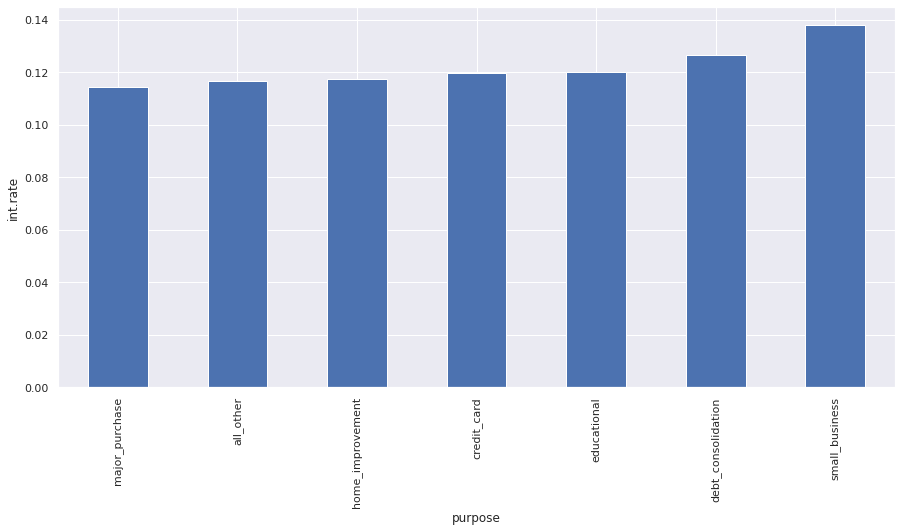

In [ ]:
sorted_pivot.plot(figsize=(15,7), kind='bar', ylabel='int.rate',legend=False)

**Extract small_business_group sample from Dataframe**

In [ ]:
small_business_group = df[df['purpose'] == 'small_business']
# Print the first five rows for this sample
small_business_group.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
13,1,small_business,0.0714,92.82,11.512925,6.50,747,4384.000000,3021,4.8,0,1,0,0
42,1,small_business,0.0870,94.98,10.126631,14.54,752,2460.000000,3660,7.8,1,0,0,0
51,1,small_business,0.1028,323.98,10.217422,10.70,712,1379.000000,3534,54.4,0,0,0,0
52,1,small_business,0.1059,813.65,10.778956,4.05,762,2729.958333,2422,23.3,0,0,0,0
55,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.958330,17214,8.1,2,1,0,0


# Descriptive Statistics of small_business_group sample (interest rates)

In [ ]:
small_business_group['int.rate'].describe()

count    619.000000
mean       0.138087
std        0.031191
min        0.071400
25%        0.114600
50%        0.137900
75%        0.160000
max        0.212100
Name: int.rate, dtype: float64

# Visualizations of Distribution of interest rates for small_business_group sample

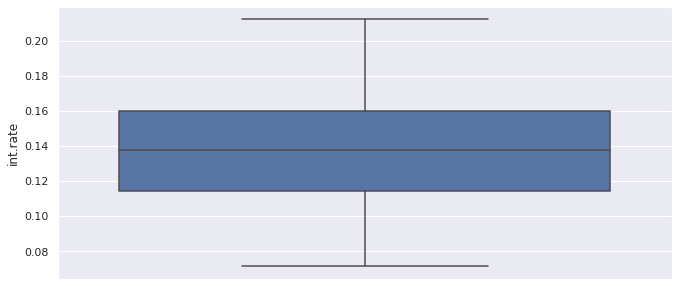

In [ ]:
plt.figure(figsize = (11,5))
sns.boxplot(y="int.rate", data=small_business_group)

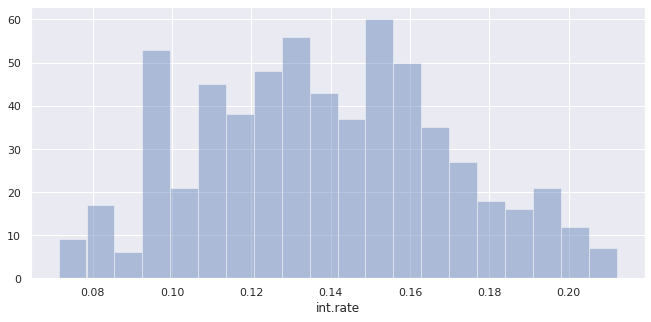

In [ ]:
plt.figure(figsize = (11,5))
ax=sns.distplot(small_business_group['int.rate'], bins=20, kde=False)

**Extract major_purchase_group sample from Dataframe**

In [ ]:
major_purchase_group = df[df['purpose'] == 'major_purchase']
# Print first five rows for this sample
major_purchase_group.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
15,1,major_purchase,0.1103,327.53,10.738915,13.04,702,8159.958333,5394,53.4,1,0,0,0
19,1,major_purchase,0.1513,173.65,11.002100,2.74,667,1126.958333,591,84.4,3,0,0,0
202,1,major_purchase,0.0743,93.23,11.184421,11.18,757,4500.041667,12430,29.6,5,0,0,0
218,1,major_purchase,0.1186,530.36,11.366743,15.10,682,3900.000000,348,4.8,0,0,0,1
225,1,major_purchase,0.0870,158.31,10.778956,0.38,717,12930.041670,498,7.3,2,1,0,0


# Descriptive Statistics for major_purchase_group sample (interest rates)


In [ ]:
major_purchase_group['int.rate'].describe()

count    437.000000
mean       0.114171
std        0.027445
min        0.070500
25%        0.089400
50%        0.115800
75%        0.134800
max        0.201700
Name: int.rate, dtype: float64

# Visualizations of Distribution of interest rates for major_purchase_group sample (interest rates)

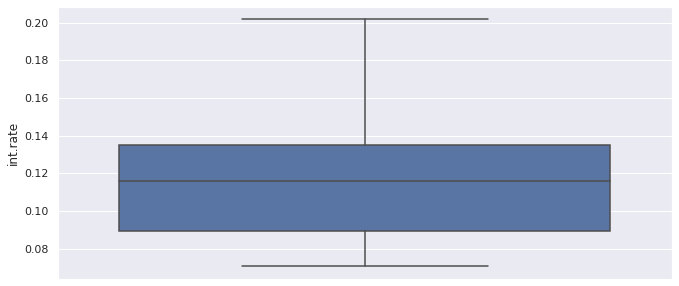

In [ ]:
plt.figure(figsize = (11,5))
sns.boxplot(y="int.rate", data=major_purchase_group)

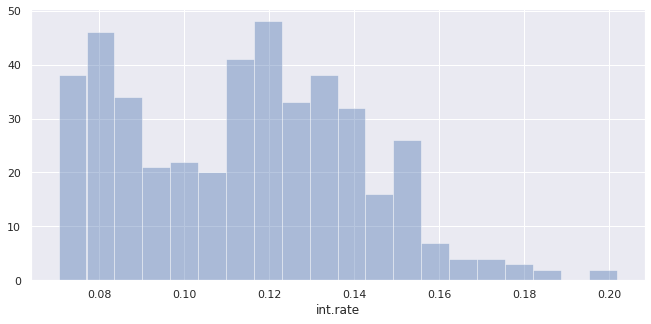

In [ ]:
plt.figure(figsize = (11,5))
ax=sns.distplot(major_purchase_group['int.rate'], bins=20, kde=False)


# Two Sample t-test
Now we run a two sample t-test between the small_business_group sample and major_purchase_group sample.  This test will also give us a p-value that will determine it's significance.

In [ ]:
stats.ttest_ind(small_business_group['int.rate'], major_purchase_group['int.rate'])

Ttest_indResult(statistic=12.888579753668804, pvalue=2.1112866852330368e-35)

# Compute sample size, mean and variace for each sample

We will need these calculations to then calculate the Standard of error and confidence intervals.


In [ ]:
H1_sample1_n = small_business_group.shape[0]
H1_sample2_n = major_purchase_group.shape[0]
H1_sample1_mean = small_business_group['int.rate'].mean()
H1_sample2_mean = major_purchase_group['int.rate'].mean()
H1_sample1_var = small_business_group['int.rate'].var()
H1_sample2_var = major_purchase_group['int.rate'].var()

# Calculate Standard of error and confidence intervals
For H1 datasets

In [ ]:
# Calculate Standard of error difference
std_error_difference_H1 = math.sqrt((H1_sample1_var/H1_sample1_n)+(H1_sample2_var/H1_sample2_n))

# Calculate mean difference
mean_difference_H1 = H1_sample1_mean - H1_sample2_mean

# Calculate margin of error
margin_of_error_H1 = 1.96 * std_error_difference_H1

# Calculate confidence intervals
ci_lower_H1 = mean_difference_H1 - margin_of_error_H1
ci_upper_H1 = mean_difference_H1 + margin_of_error_H1

print("The difference between the two sample means at a 95% confidence is between "+str(ci_lower_H1)+" and "+str(ci_upper_H1)+". ")

The difference between the two sample means at a 95% confidence is between 0.02035814354542845 and 0.02747413188220071. 


# Result of our first Sample t-test
For our first test, we reject the Null Hypothesis that states "There is no difference between the sample mean of interest rates for small_business loans and sample mean of interest rates for major_purchase loans."

The difference is significant at p<0.05 level.

The difference between the two sample means is between 0.02036 and 0.02747 at a 95% confidence.


# **Hypothesis 2**

H0: µ1-µ2=0 : There is no difference between the sample mean of FICO scores that *do not* meet the underwriting policy and the sample mean of FICO scores that *do* meet the underwriting policy.

Ha: µ1-µ2≠0 :There is a difference between the sample mean of FICO scores that *do not* meet the underwriting policy and the sample mean of FICO scores that *do* meet the underwriting policy.

# Comparison of FICO scores with "0" credit policy (does not meet) vs FICO scores with "1" credit policy (meet)


([<matplotlib.axis.XTick at 0x7fbb1ed85ed0>,
 [Text(0, 0, 'Does not meet policy'), Text(0, 0, 'Meets policy')])

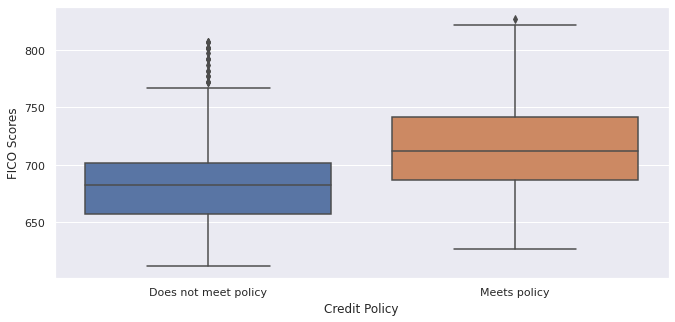

In [ ]:
plt.figure(figsize = (11,5))
sns.boxplot(y="fico", x="credit.policy", data=df)
plt.xlabel('Credit Policy')
plt.ylabel('FICO Scores')
plt.xticks([0,1], ['Does not meet policy', 'Meets policy'])

**Extract FICO Score that do not meet the underwriting policy from the Data Frame**

In [ ]:
FICO_0_policy = df[df['credit.policy'] == 0]
# Print first 5 rows of sample
FICO_0_policy.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7710,0,debt_consolidation,0.1608,35.20,10.308953,23.84,642,2490.000000,10125,90.4,1,0,0,0
7711,0,debt_consolidation,0.1608,246.38,12.152144,22.47,647,7212.000000,150971,92.3,4,0,0,1
7712,0,debt_consolidation,0.1600,787.53,11.264464,19.34,682,3780.041667,15897,66.0,5,0,1,0
7713,0,educational,0.1640,126.40,10.308953,29.60,677,1643.000000,3043,58.5,1,0,0,1
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.000000,26531,52.6,33,0,0,1


# Descriptive Statistics of FICO_0_policy sample (FICO scores)

In [ ]:
FICO_0_policy['fico'].describe()

count    1868.000000
mean      683.978051
std        30.950970
min       612.000000
25%       657.000000
50%       682.000000
75%       702.000000
max       807.000000
Name: fico, dtype: float64

# Visualizations of Distribution for FICO_0_policy sample (FICO scores)


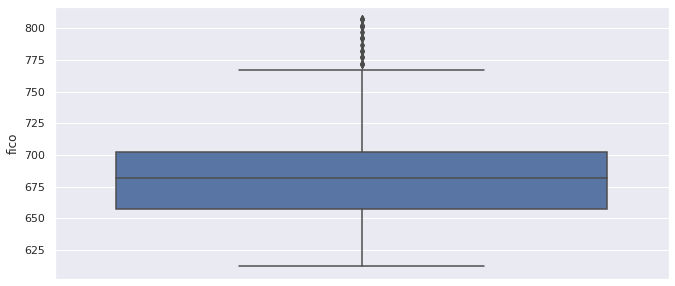

In [ ]:
plt.figure(figsize = (11,5))
sns.boxplot(y="fico", data=FICO_0_policy)


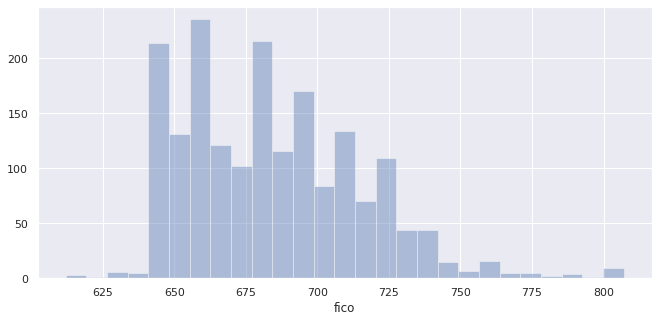

In [ ]:
plt.figure(figsize = (11,5))
ax = sns.distplot(FICO_0_policy['fico'], kde=False)

**Extract FICO scores sample that do meet the underwriting policy from Data Frame**

In [ ]:
FICO_1_policy = df[df['credit.policy'] == 1]
FICO_1_policy.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Descriptive Statistics of FICO_1_policy sample (FICO scores)

In [ ]:
FICO_1_policy['fico'].describe()

count    7710.000000
mean      717.356031
std        36.630697
min       627.000000
25%       687.000000
50%       712.000000
75%       742.000000
max       827.000000
Name: fico, dtype: float64

# Visualizations of Distribution for FICO_1_policy sample (FICO scores)

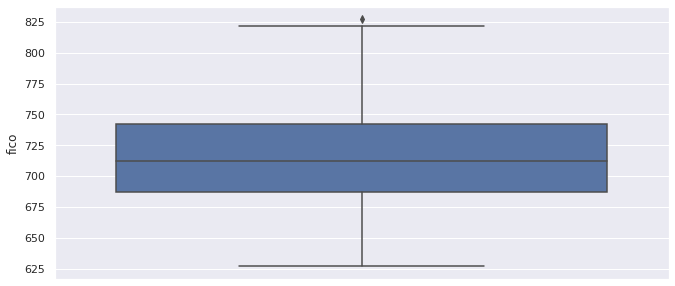

In [ ]:
plt.figure(figsize = (11,5))
sns.boxplot(y="fico", data=FICO_1_policy)

<Figure size 792x360 with 0 Axes>

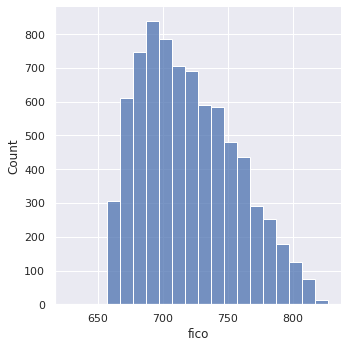

In [ ]:
plt.figure(figsize = (11,5))
ax=sns.displot(FICO_1_policy['fico'], bins=20, kde=False)

# Two Sample t-test
Now we run a two sample t-test between the FICO_0_policy sample and FICO_1_policy sample.  This test will also give us a p-value that will determine it's significance.

In [ ]:
stats.ttest_ind(FICO_0_policy['fico'], FICO_1_policy['fico'])

Ttest_indResult(statistic=-36.36259987408664, pvalue=2.6100416830751396e-271)

# Compute sample size, mean difference, and variance for each sample

Again, we will need these to calculate the Standard of error and confidence interval.


In [ ]:
H2_sample1_n = FICO_0_policy.shape[0]
H2_sample2_n = FICO_1_policy.shape[0]
H2_sample1_mean = FICO_0_policy['fico'].mean()
H2_sample2_mean = FICO_1_policy['fico'].mean()
H2_sample1_var = FICO_0_policy['fico'].var()
H2_sample2_var = FICO_1_policy['fico'].var()

# Calculate Standard of error and confidence intervals
For H2 datasets

In [ ]:
# Calculate Standard of error difference
std_error_difference_H2 = math.sqrt((H2_sample1_var/H2_sample1_n)+(H2_sample2_var/H2_sample2_n))

# Calculate mean difference
mean_difference_H2 = H2_sample1_mean - H2_sample2_mean

# Calculate margin of error
margin_of_error_H2 = 1.96 * std_error_difference_H2

# Calculate confidence intervals
ci_lower_H2 = mean_difference_H2 - margin_of_error_H2
ci_upper_H2 = mean_difference_H2 + margin_of_error_H2

print("The difference between the two sample means at a 95% confidence is between "+str(ci_lower_H2)+" and "+str(ci_upper_H2)+". ")

The difference between the two sample means at a 95% confidence is between -35.00237244523385 and -31.75358702784944. 


# Result of our second Sample t-test

For our second test, we reject the Null Hypothesis that states "There is no difference between the sample mean of FICO scores that do not meet the underwriting policy and the sample mean of FICO scores that do meet the underwriting policy."

The difference is significant at p<0.05 level.

The difference between the two sample means is between 35.0024 and 31.7536 at a 95% confidence.

# Conclusion

In our first Hypothesis test, we can clearly see that the purpose of the loan does affect the interest rate.  There is a possibility that it may be due to the term of the loan or maybe due to the collateral...maybe there's more collateral on a major purchase (home) and it makes the loan less riskier than a small business.

In our second Hypothesis test, we can see that FICO scores clearly have an affect on the borrower's chances of meeting Lending Club's underwriting policy.  Here in America, credit score tell a lot about the borrower's credit history and whether or not they are likely to pay the loan back.

As consumers, it is our responsibility to do our research and be responsible when it comes to our credit scores, as it one of the ways banks (or any other organization) will tell a lot about us as individuals.